# Project to analyze Kenya YouTube channels using Python and YouTube API.

In [48]:
! pip install textblob

  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from collections import Counter
import re


from textblob import TextBlob

In [17]:
API_KEY =""

In [19]:
def get_channel_info(channel_id, api_key, counter):
    my_url = f"https://www.googleapis.com/youtube/v3/channels?part=statistics,brandingSettings,snippet&id={channel_id}&key={api_key}"
    json_result = requests.get(my_url)
    data = json.loads(json_result.text)
    channel_stats = data["items"][0]["statistics"]
    channel_brand = data["items"][0]["brandingSettings"]
    channel_snippet = data["items"][0]["snippet"]
    channel_title = channel_brand['channel']['title']
    #channel_pub_date = channel_snippet['publishedAt']
    #channel_pub_date = datetime.strptime(channel_snippet['publishedAt'], '%Y-%m-%d')
    channel_pub_date = channel_snippet['publishedAt'][:10]
    view_count = int(channel_stats['viewCount'])
    subscriber_count = int(channel_stats['subscriberCount'])
    video_count = int(channel_stats['videoCount'])
    views_per_video = int(view_count / video_count)
    print(counter, "Title:", channel_title, end=". ")
    print("Views:", "{:,}".format(view_count), end=". ")
    print("Subscribers:", "{:,}".format(subscriber_count), end=". ")
    print("Videos:", "{:,}".format(video_count))
    print("Views per video:", "{:,}".format(views_per_video), end=". ")
    print("Published At:", channel_pub_date)
    print()
    return (channel_title, view_count, subscriber_count, video_count, views_per_video, channel_pub_date)

In [21]:
channels = {"Miss Trudy":"UCoxvnjTutXQ8jQPP9MAXfYw","Chef Raphael":"UC_Ffn_VUVoj-rsLWzRfPiug",
            "Wanjiru Njiru":"UCjEDe4qGQGaXW6jFWaQtlUw","Real Housewives":"UCP456Szyc9zy-f0j3UoHzeg",
            "Eric Omondi":"UC4Hvs9PzuXKhEY_CeTS1wvg","WaJesus":"UCHVTpHXp43Giiwag5s6o8xQ",
            "Jalang'o":"UCFG1zHs55s1my124O3Nk9DQ","Diana Bahati":"UC0UslOx9EYxnk_4SFSHj8hA",
            "Desagu":"UC7MGnWilDcg157op0eKI1Tg","Mammito ":"UC689kBEhYQaGYypvrFqQoRg",
            "One-Room": "UC-pIpcXWtFVSdAeIICEYLLw",
            "Dee Mwango":"UCZD5OZHEyYG60lF8SBh_JVQ","Kinyash": "UCyJifa0eN9A_A7RCL3M2lew", 
            "Natalie":"UCKnUxxnZMs0Ig0ge3Ust_EQ","Over_25": "UChKyC8GgChB5_JEW7p8nkFA", 
            "TMI" : "UC6fVFxrbf0HDRW3B2mdWFGA", 
            "TheJoyRide":"UCCjULCQvh2cQQLzYe4DC2Nw", 
            "Comrades": "UCgFvn4mEAXU64TMu3xu7-Vw", "Maggie Mwende": "UCqYQWEkEMiFxEcRT2c793EQ",
           "Sharon Mundia": "UCqu5xVuKbxcfSfiKv4zZM4Q", "Shared Moments": "UCAvd919a1ibeG5cp5QtwXOw",
           "Just Doing Life": "UCSMj4RGIb7GMFboG89k4cRQ", "Priter Homes":"UCRyGxm0MUPl1pr3WvuwNmWA", 
            "Lynn Ngugi":"UCa2gldA2ivhzMwIJRA5683w", "Zulu":"UCBfWotql3sY2ZtEHSdB6FLg", 
            "Muthoni's Mission":"UCy1yvy92mkbs3NBSZO2WSrw", "Kitt":"UCVaf_2OTeD0BT9HIsBYggOA", 
           "Mantalkke": "UCmBQsChFjOTcqv7D6sT8dPw", "Abel Mutua" : "UC4tjY2tTltEKePusozUxtSA",
           "Suzy": "UCVQPfgeFVWjQs59W9DHFkEw", #"Kibe":"UC8Am29Ya-UUSjgwg8Vz-sgA",
            "2mbili":"UCgBiPL_DFIM84m4wErC0F0w",
           "Nick Kioko":"UC12eompzzck1ixip4FezoOQ", "MoneyWise":"UCN6_Kze4Oan1grlfbH-faig",
           "Centonomy":"UCLv5Fgh4tUCVy7vhyFyvo-w", "Goshen":"UCqAG9vkONY1oxILMsCwbn4A",
           "drama":"UCuxvPaI540gQtEfo1X5i3Dg", "Eddie":"UClkXE1xfSwdx07G_MkFgQGA",
           "I Am Marwa":"UCi2uaWdy6OTf4Ty7DVC_7lw", #"Syombua": "UCn_K0JBhFcbww7xbTPBn0Zg", 
           "Otis": "UCjG66-ryVCszrs7k_Y2pn3Q", "kenyan Historian": "UCODfbZEY-7nsJgfdVvJOanQ",
           "Carnversations":"UCXuETxBeo2GdK93bE6U5NoQ", "Engage": "UCD-Mf4F5ZQ1Jw-nb2gqD1mw",
           "Caroline Mutoko":"UCXhzyO0aIZtrBdHqyn3VMxg", "Njugush":"UCkV3t4uxBsi8jYj3wjqooeQ",
           "Bena wa Malines":"UC8X2GaSVPF2AGF8gCv5C0-w", "Awinja":"UCSkQTaT1wFrmPCK5d-Zr2Ng",
           "Huku Yues":"UCIQX2vUaP8QSnFgV5YDpDGA", "African Traveller":"UC1v9sWTan_S2l4JGSy7gXCQ",
           "CTA":"UC9xBLAzNAgV9SfnJuXhGnOw", "Tales of the crazy Kennar":"UCiXj0BfxM0WQGFr9mxdR0qg",
            "Chams Media":"UC8eVReYsJE-VMq_jRDrzHlg", "Terence Creative":"UCkV9PCA7E-WSSN9Px9kKj8A",
            "Eve Mungai":"UCcBNWxvAXH-nTAzOeuuLHgw","Jaymo Yule Msee":"UCfYr2UvWrGiTsbrxkaBeNqg", 
            "Wairimu Kimani":"UCj-gRc8nHRhwkFNH-kIKFnA", "Plug TV":"UCwNlZfIT5e0tU2Z_b7gmtiQ", 
            "Thee Pluto":"UCMMmy64_0rySSPUu0xohuCQ", "Edgar Obare":"UCZ72q53EdgBKTVegliUB3Eg",
           "Janet Mbugua":"UCqkUvGR2fwYcCeTHeuzkgtA", "Monk Kenyan Comedian":"UCVGdyBokjpxwzIfsSR5L75A",
           "Rosina Sharon":"UCEKDSEY09EydxBGdqUiK_8g", "TT Comedian": "UCXxrjCtnluGtthoTg5jrlNQ",
           "Presenter Ali":"UCMD-JmezXoQiV9PiWLwVpGQ", "I am Kabugi":"UCXev9LHRu7wYAL8NP153lhg",
           "BTG News":"UCqMUgS3mCuLsOkE4W1DsAfA"}

In [22]:
# initialize dictionary of lists.
results_data = {'title': [],
         'views': [],
         'subscribers': [],
         'videos': [],
         'views_per_video': [],
        'published_at':[]
                
        }

In [23]:
print()
counter = 0
for channel in channels:
    channel_id = channels[channel]
    counter += 1
    channel_stats = get_channel_info(channel_id, API_KEY, counter)
    # Create DataFrame
    results_data["title"].append(channel_stats[0])
    results_data["views"].append(channel_stats[1])
    results_data["subscribers"].append(channel_stats[2])
    results_data["videos"].append(channel_stats[3])
    results_data["views_per_video"].append(channel_stats[4])
    pub_date = datetime.strptime(channel_stats[5], '%Y-%m-%d')
    results_data["published_at"].append(pub_date)
    results_df = pd.DataFrame(results_data)
    
print("Done")


1 Title: Miss Trudy. Views: 73,880,471. Subscribers: 440,000. Videos: 1,056
Views per video: 69,962. Published At: 2014-05-15

2 Title: Chef Raphael. Views: 17,935,867. Subscribers: 274,000. Videos: 432
Views per video: 41,518. Published At: 2013-01-04

3 Title: Wanjiru Njiru. Views: 4,570,802. Subscribers: 51,500. Videos: 148
Views per video: 30,883. Published At: 2011-10-03

4 Title: The Real Househelps of Kawangware. Views: 161,372,322. Subscribers: 388,000. Videos: 710
Views per video: 227,284. Published At: 2014-03-24

5 Title: Eric Omondi. Views: 62,890,579. Subscribers: 570,000. Videos: 206
Views per video: 305,294. Published At: 2011-10-13

6 Title: THE WAJESUS FAMILY. Views: 170,910,383. Subscribers: 784,000. Videos: 789
Views per video: 216,616. Published At: 2011-05-14

7 Title: Jalango TV. Views: 81,602,035. Subscribers: 676,000. Videos: 1,783
Views per video: 45,766. Published At: 2016-04-11

8 Title: DIANA BAHATI. Views: 209,963,068. Subscribers: 1,080,000. Videos: 787
V

# Number of Videos

In [24]:
vid_count_df = results_df.sort_values(['videos', 'views'], axis=0, ascending=False, kind='quicksort', na_position='last').reset_index(drop=True)

In [25]:
vid_count_df.head(20)

,title,views,subscribers,videos,views_per_video,published_at
0,BTG News,66780684,334000,4139,16134,2018-11-02
1,PLUG TV,114002138,484000,3435,33188,2016-08-25
2,2mbili Tv,63873708,241000,3326,19204,2013-06-21
3,Kenya Online Media,154232758,786000,2812,54848,2020-01-21
4,CTA - Cleaning The Airwaves,19340856,126000,2750,7033,2011-09-17
5,iam_marwa,171546859,544000,2658,64539,2014-11-03
6,Grand Acres by Goshen Acquisitions,1068539,14300,2116,504,2016-11-05
7,Benjamin Zulu Global,18907819,165000,2107,8973,2020-02-13
8,Nicholas Kioko,83885471,535000,1836,45689,2017-07-25
9,Jalango TV,81602035,676000,1783,45766,2016-04-11


In [26]:
vid_count_df

,title,views,subscribers,videos,views_per_video,published_at
0,BTG News,66780684,334000,4139,16134,2018-11-02
1,PLUG TV,114002138,484000,3435,33188,2016-08-25
2,2mbili Tv,63873708,241000,3326,19204,2013-06-21
3,Kenya Online Media,154232758,786000,2812,54848,2020-01-21
4,CTA - Cleaning The Airwaves,19340856,126000,2750,7033,2011-09-17
...,...,...,...,...,...,...
60,Wanjiru Njiru,4570802,51500,148,30883,2011-10-03
61,Aicy Stevens & Nick Kwach,13052118,150000,122,106984,2019-06-21
62,benawamalines,4049318,73500,86,47085,2022-07-06
63,Eddie Butita,32838248,350000,85,386332,2013-08-12


In [27]:
colours = []
for i in range(20):
    new_colour = "#0"+str(69+i)+"AF3"
    colours.append(new_colour)

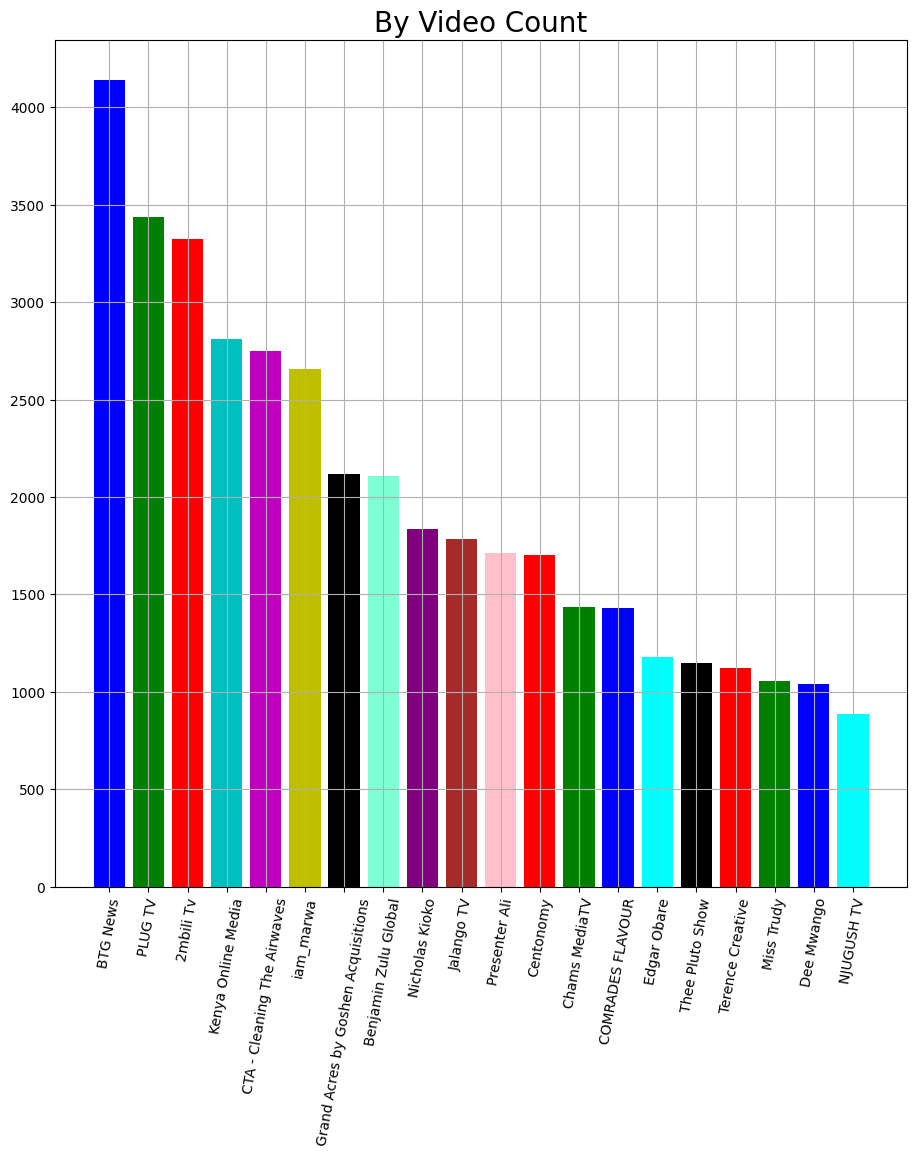

In [28]:
x = vid_count_df.head(20).title
y = vid_count_df.head(20).videos
colours = ['b', 'g', 'r', 'c', 'm',
          'y', 'k', 'aquamarine', 'purple', 'brown',
          'pink', 'red', 'green', 'blue', 'cyan',
          'black', 'red', 'green', 'blue', 'cyan']

plt.bar(x,y, color=colours)
plt.grid()
plt.title("By Video Count", fontsize = 20)
fig = plt.gcf()
fig.set_size_inches(11,11)
plt.xticks(rotation=80)
plt.show()

In [ ]:
now = datetime.now()
current_time = now.strftime("%Y-%m-%d-%H-%M-%S")
file_name ='vid_count_'+current_time+'.csv'
vid_count_df.to_csv(file_name)

# Subscribers

In [29]:
subs_df = results_df.sort_values(['subscribers', 'views'], axis=0, ascending=False, kind='quicksort', na_position='last').reset_index(drop=True)

In [30]:
subs_df.head(20)

,title,views,subscribers,videos,views_per_video,published_at
0,TT Comedian,221280232,1090000,284,779155,2021-01-13
1,DIANA BAHATI,209963068,1080000,787,266789,2019-08-19
2,Lynn Ngugi,140378160,1040000,454,309202,2012-04-30
3,Thee Pluto Show,242831613,946000,1149,211341,2018-01-05
4,Rosina Sharon,48243923,818000,253,190687,2013-03-09
5,Kenya Online Media,154232758,786000,2812,54848,2020-01-21
6,THE WAJESUS FAMILY,170910383,784000,789,216616,2011-05-14
7,Flaqo Raz,135526700,767000,250,542106,2015-03-04
8,Henry DeSagu,106157655,677000,615,172614,2016-08-11
9,Jalango TV,81602035,676000,1783,45766,2016-04-11


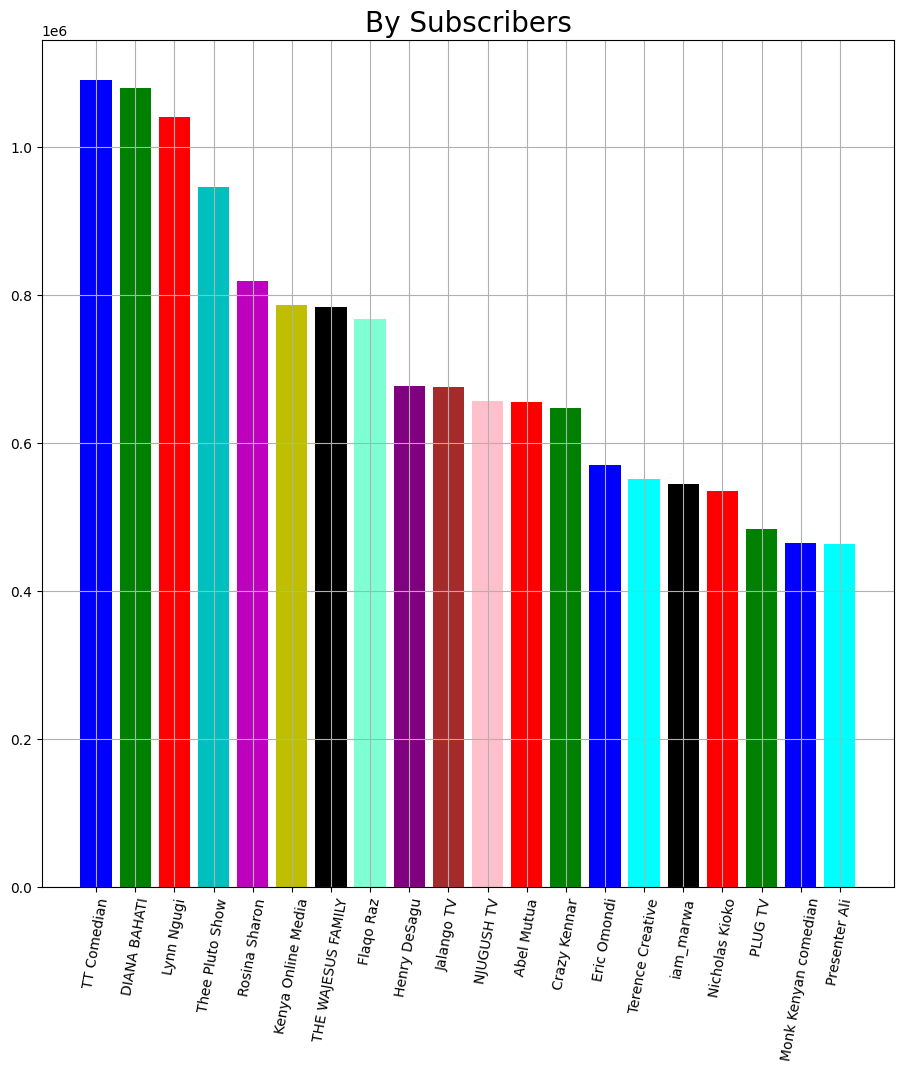

In [32]:
x = subs_df.head(20).title
y = subs_df.head(20).subscribers
colours = ['b', 'g', 'r', 'c', 'm',
          'y', 'k', 'aquamarine', 'purple', 'brown',
          'pink', 'red', 'green', 'blue', 'cyan',
          'black', 'red', 'green', 'blue', 'cyan']
plt.bar(x,y, color=colours)
plt.grid()
plt.title("By Subscribers", fontsize = 20)
#plt.legend(results_df.head(20).title)
#ax = results_df.plot()
#ax.yaxis.set_major_formatter(plt.yaxis.StrMethodFormatter('{x:,.0f}'))
fig = plt.gcf()
fig.set_size_inches(11,11)
plt.xticks(rotation=80)
plt.show()

In [33]:
now = datetime.now()
current_time = now.strftime("%Y-%m-%d-%H-%M-%S")
file_name ='subscribers_'+current_time+'.csv'
subs_df.to_csv(file_name)

# Views

In [35]:
results_by_view_df = results_df.sort_values(['views', 'subscribers'], axis=0, ascending=False, kind='quicksort', na_position='last').reset_index(drop=True)

In [36]:
results_by_view_df.head(20)

,title,views,subscribers,videos,views_per_video,published_at
0,Thee Pluto Show,242831613,946000,1149,211341,2018-01-05
1,TT Comedian,221280232,1090000,284,779155,2021-01-13
2,DIANA BAHATI,209963068,1080000,787,266789,2019-08-19
3,COMRADES FLAVOUR,206233467,406000,1429,144320,2015-08-15
4,iam_marwa,171546859,544000,2658,64539,2014-11-03
5,THE WAJESUS FAMILY,170910383,784000,789,216616,2011-05-14
6,Crazy Kennar,166975925,647000,627,266309,2017-07-24
7,The Real Househelps of Kawangware,161372322,388000,710,227284,2014-03-24
8,Kenya Online Media,154232758,786000,2812,54848,2020-01-21
9,Lynn Ngugi,140378160,1040000,454,309202,2012-04-30


In [38]:
results_by_view_df.dtypes

title                      object
views                       int64
subscribers                 int64
videos                      int64
views_per_video             int64
published_at       datetime64[ns]
dtype: object

In [39]:
results_by_view_df.describe()

,views,subscribers,videos,views_per_video,published_at
count,6.500000e+01,6.500000e+01,65.000000,65.000000,65
mean,5.831781e+07,3.343292e+05,869.784615,107727.584615,2016-03-21 19:34:09.230769152
min,9.819270e+05,1.430000e+04,80.000000,504.000000,2011-03-12 00:00:00
25%,1.305212e+07,1.130000e+05,218.000000,20506.000000,2013-10-08 00:00:00
50%,2.543056e+07,1.890000e+05,481.000000,45766.000000,2015-09-21 00:00:00
75%,8.388547e+07,5.350000e+05,1122.000000,144320.000000,2018-11-02 00:00:00
max,2.428316e+08,1.090000e+06,4139.000000,779155.000000,2022-07-06 00:00:00
std,6.459449e+07,2.930167e+05,920.611626,139668.889860,NaN


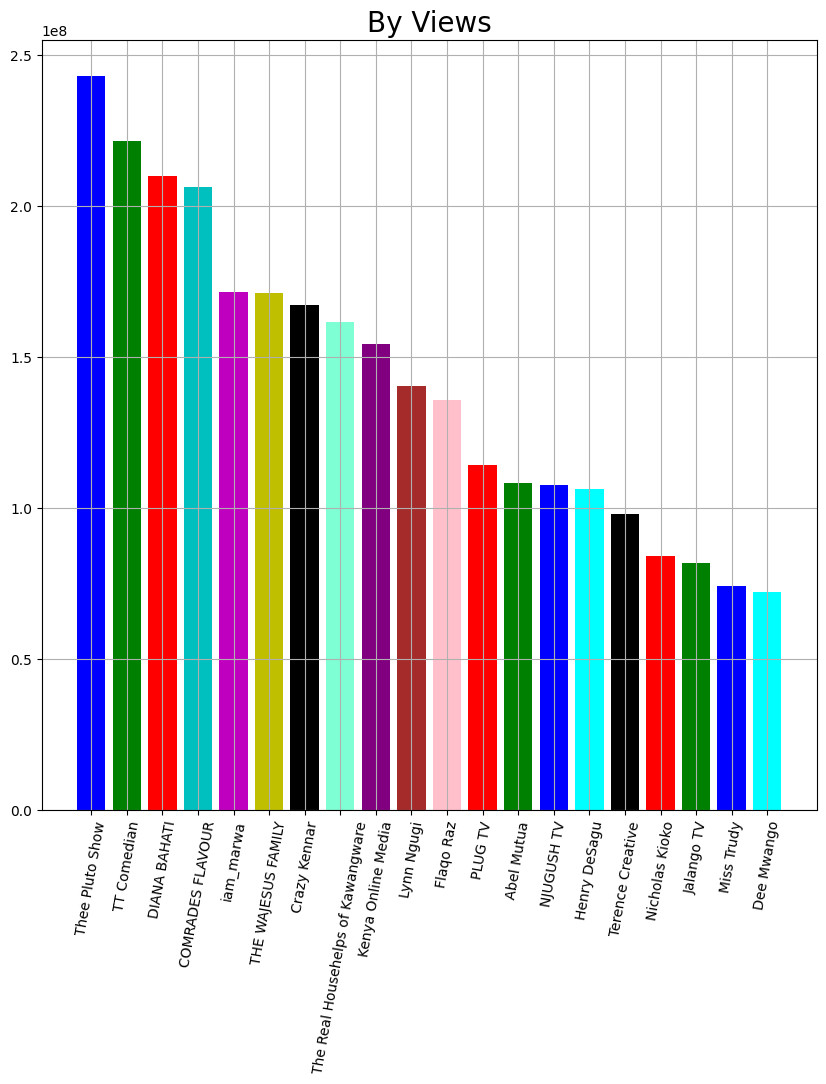

In [40]:
x = results_by_view_df.head(20).title
#y2 = results_by_view_df.head(20).subscribers
y = results_by_view_df.head(20).views
colours = ['b', 'g', 'r', 'c', 'm',
          'y', 'k', 'aquamarine', 'purple', 'brown',
          'pink', 'red', 'green', 'blue', 'cyan',
          'black', 'red', 'green', 'blue', 'cyan']
plt.bar(x,y, color=colours)
plt.title("By Views", fontsize = 20)
plt.grid()
#plt.legend(results_df.head(20).title)
#ax = results_df.plot()
#ax.yaxis.set_major_formatter(plt.yaxis.StrMethodFormatter('{x:,.0f}'))
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(rotation=80)
plt.show()

In [ ]:
now = datetime.now()
current_time = now.strftime("%Y-%m-%d-%H-%M-%S")
file_name ='views_'+current_time+'.csv'
results_by_view_df.to_csv(file_name)

# Views per Video

In [41]:
views_per_vid_df = results_df.sort_values(['views_per_video', 'views'], axis=0, ascending=False, kind='quicksort', na_position='last').reset_index(drop=True)

In [42]:
views_per_vid_df.head(20)

,title,views,subscribers,videos,views_per_video,published_at
0,TT Comedian,221280232,1090000,284,779155,2021-01-13
1,Flaqo Raz,135526700,767000,250,542106,2015-03-04
2,Eddie Butita,32838248,350000,85,386332,2013-08-12
3,Monk Kenyan comedian,63090403,465000,203,310790,2017-08-07
4,Lynn Ngugi,140378160,1040000,454,309202,2012-04-30
5,Eric Omondi,62890579,570000,206,305294,2011-10-13
6,Awinja Nyamwalo - Jacky Vike,71504981,381000,250,286019,2017-04-24
7,DIANA BAHATI,209963068,1080000,787,266789,2019-08-19
8,Crazy Kennar,166975925,647000,627,266309,2017-07-24
9,Abel Mutua,107989850,655000,443,243769,2011-05-20


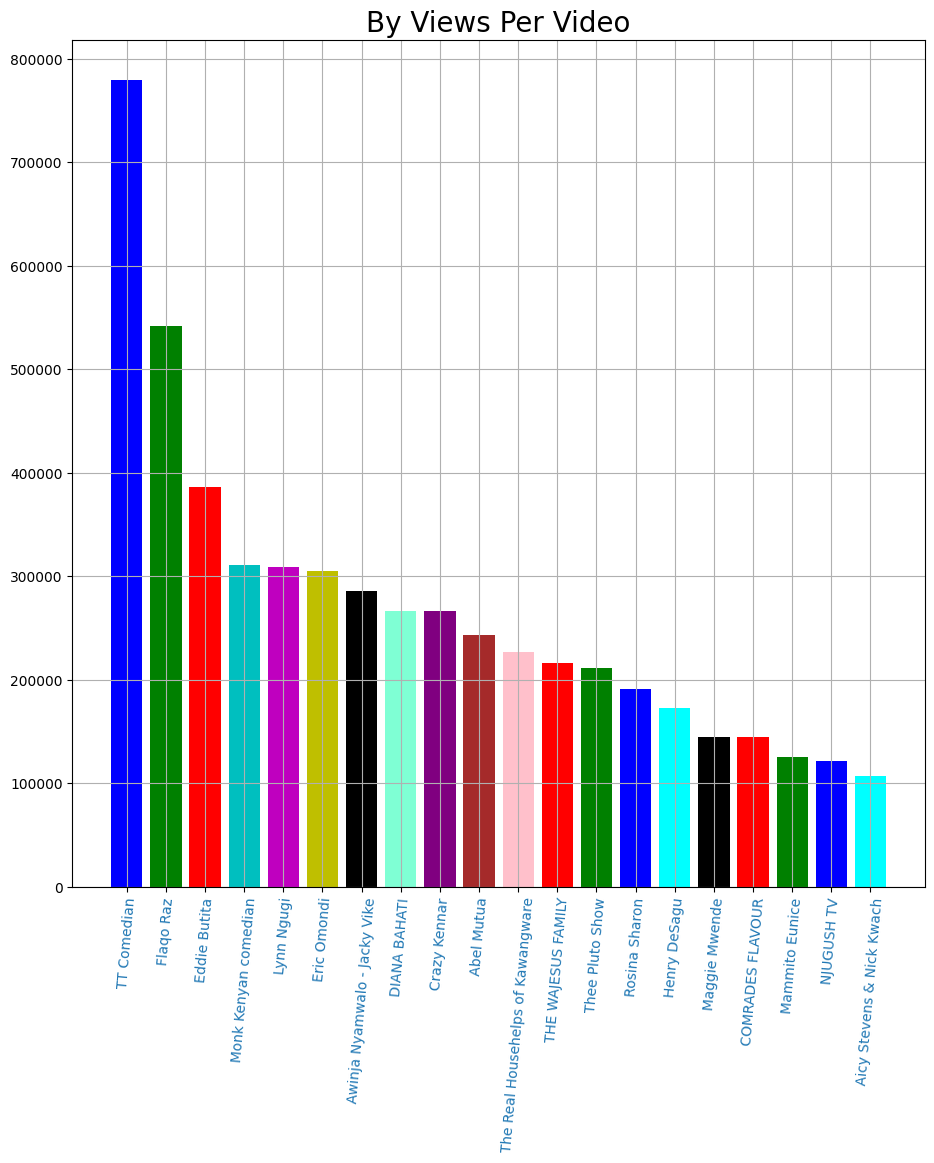

In [43]:
x = views_per_vid_df.head(20).title
y = views_per_vid_df.head(20).views_per_video
#y2 = results_by_view_df.head(20).subscribers
colours = ['b', 'g', 'r', 'c', 'm',
          'y', 'k', 'aquamarine', 'purple', 'brown',
          'pink', 'red', 'green', 'blue', 'cyan',
          'black', 'red', 'green', 'blue', 'cyan']
#plt.bar(x,y2, label='subs')
plt.bar(x,y, color=colours)

plt.grid()
#plt.legend()
plt.title("By Views Per Video", fontsize = 20)
fig = plt.gcf()
fig.set_size_inches(11,11)
plt.xticks(rotation=85, color='tab:blue')
plt.show()

In [44]:
now = datetime.now()
current_time = now.strftime("%Y-%m-%d-%H-%M-%S")
file_name ='views_per_vid_'+current_time+'.csv'
views_per_vid_df.to_csv(file_name)

In [45]:
now = datetime.now()
current_time = now.strftime("%Y-%m-%d-%H-%M-%S")
print(current_time)

2024-09-04-10-24-54


## Fetch Video IDs for the Channels
To analyze engagement and content, you'll need the video IDs of the videos from the channels you're interested in.

In [50]:
def get_channel_video_ids(channel_id):
    """
    Retrieves all video IDs from a YouTube channel.
    """
    # Get Uploads playlist ID
    url = f"https://www.googleapis.com/youtube/v3/channels?part=contentDetails&id={channel_id}&key={API_KEY}"
    response = requests.get(url).json()
    uploads_playlist_id = response['items'][0]['contentDetails']['relatedPlaylists']['uploads']

    # Fetch video IDs from the playlist
    video_ids = []
    next_page_token = None

    while True:
        playlist_url = f"https://www.googleapis.com/youtube/v3/playlistItems?part=contentDetails&playlistId={uploads_playlist_id}&maxResults=50&key={API_KEY}"
        if next_page_token:
            playlist_url += f"&pageToken={next_page_token}"
        playlist_response = requests.get(playlist_url).json()
        
        for item in playlist_response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        
        next_page_token = playlist_response.get('nextPageToken')
        if not next_page_token:
            break
        
        time.sleep(1)  # Sleep to respect rate limits

    return video_ids


In [51]:
channel_id = 'UC4tjY2tTltEKePusozUxtSA' # using Abel Mutua's channel (Mkurugenzi :))
video_ids = get_channel_video_ids(channel_id)
print(f"Total videos found: {len(video_ids)}")

Total videos found: 443


In [52]:
def get_videos_engagement(video_ids):
    """
    Retrieves engagement metrics for a list of video IDs.
    """
    engagement_data = []

    for i in range(0, len(video_ids), 50):  # API allows up to 50 IDs per request
        batch_ids = video_ids[i:i+50]
        ids = ','.join(batch_ids)
        url = f"https://www.googleapis.com/youtube/v3/videos?part=statistics&id={ids}&key={API_KEY}"
        response = requests.get(url).json()
        
        for item in response.get('items', []):
            stats = item['statistics']
            engagement_data.append({
                'video_id': item['id'],
                'view_count': int(stats.get('viewCount', 0)),
                'like_count': int(stats.get('likeCount', 0)),
                'comment_count': int(stats.get('commentCount', 0)),
                
            })
        
        time.sleep(1)  # Sleep to respect rate limits

    return pd.DataFrame(engagement_data)


In [53]:
engagement_df = get_videos_engagement(video_ids)
engagement_df.head()

,video_id,view_count,like_count,comment_count
0,U8YmPuEz-4Q,142858,4616,467
1,VEkBEJCncik,160551,4871,441
2,Q7Gpo1yaFmY,211427,5779,403
3,wpMX1vtZXLo,171968,4547,290
4,xJfNI2ayZXk,149668,4643,394


## Perform Video Content Analysis
Function to Get Video Metadata

In [54]:
def get_videos_metadata(video_ids):
    """
    Retrieves metadata (title, description, tags, category) for a list of video IDs.
    """
    metadata_list = []

    for i in range(0, len(video_ids), 50):
        batch_ids = video_ids[i:i+50]
        ids = ','.join(batch_ids)
        url = f"https://www.googleapis.com/youtube/v3/videos?part=snippet&id={ids}&key={API_KEY}"
        response = requests.get(url).json()
        
        for item in response.get('items', []):
            snippet = item['snippet']
            metadata_list.append({
                'video_id': item['id'],
                'title': snippet.get('title'),
                'description': snippet.get('description'),
                'tags': snippet.get('tags', []),
                'published_at': snippet.get('publishedAt'),
                'category_id': snippet.get('categoryId')
            })
        
        time.sleep(1)  # Sleep to respect rate limits

    return pd.DataFrame(metadata_list)


In [55]:
metadata_df = get_videos_metadata(video_ids)
metadata_df.head()


,video_id,title,description,tags,published_at,category_id
0,U8YmPuEz-4Q,Serial Swindler - Young & Stupid 8 Ep 10,The ultimate relationship trainwreck! Our her...,[],2024-09-01T17:30:21Z,24
1,VEkBEJCncik,Bachelor Of Romance - Mkurugenzi Minisodes 7 Ep 3,Join us for the ultimate university drama! Our...,[],2024-08-29T17:30:26Z,24
2,Q7Gpo1yaFmY,Jenny From The Block - Young & Stupid 8 Ep 9,A couple’s quest for a better life in Canada t...,[],2024-08-25T17:30:06Z,24
3,wpMX1vtZXLo,Blue Uniform - Mkurugenzi Minisodes 7 Ep 2,"One weekend, a young man vowed to skip the clu...",[],2024-08-21T17:30:06Z,24
4,xJfNI2ayZXk,The Fall of An Honest Man Part 3 - Mkurugenzi ...,"In Part 3 of ""The Fall Of An Honest Man"" from ...",[],2024-08-18T17:30:18Z,24


## Merge Data and Update Existing Data Structures
Merge Engagement and Metadata DataFrames:

In [56]:


full_df = pd.merge(engagement_df, metadata_df, on='video_id')
full_df.head()


,video_id,view_count,like_count,comment_count,title,description,tags,published_at,category_id
0,U8YmPuEz-4Q,142858,4616,467,Serial Swindler - Young & Stupid 8 Ep 10,The ultimate relationship trainwreck! Our her...,[],2024-09-01T17:30:21Z,24
1,VEkBEJCncik,160551,4871,441,Bachelor Of Romance - Mkurugenzi Minisodes 7 Ep 3,Join us for the ultimate university drama! Our...,[],2024-08-29T17:30:26Z,24
2,Q7Gpo1yaFmY,211427,5779,403,Jenny From The Block - Young & Stupid 8 Ep 9,A couple’s quest for a better life in Canada t...,[],2024-08-25T17:30:06Z,24
3,wpMX1vtZXLo,171968,4547,290,Blue Uniform - Mkurugenzi Minisodes 7 Ep 2,"One weekend, a young man vowed to skip the clu...",[],2024-08-21T17:30:06Z,24
4,xJfNI2ayZXk,149668,4643,394,The Fall of An Honest Man Part 3 - Mkurugenzi ...,"In Part 3 of ""The Fall Of An Honest Man"" from ...",[],2024-08-18T17:30:18Z,24


## Analyze and Visualize the Data
### Engagement Ratios:

In [83]:
# Calculate Like to View Ratio
full_df['like_view_ratio'] = full_df['like_count'] / full_df['view_count']

# Calculate Comment to View Ratio
full_df['comment_view_ratio'] = full_df['comment_count'] / full_df['view_count']

full_df.head()


,video_id,view_count,like_count,comment_count,title,description,tags,published_at,category_id,like_view_ratio,comment_view_ratio,title_sentiment,description_keywords
0,U8YmPuEz-4Q,142858,4616,467,Serial Swindler - Young & Stupid 8 Ep 10,The ultimate relationship trainwreck! Our her...,[],2024-09-01T17:30:21Z,24,0.032312,0.003269,-0.35,"[the, ultimate, relationship, trainwreck, our,..."
1,VEkBEJCncik,160551,4871,441,Bachelor Of Romance - Mkurugenzi Minisodes 7 Ep 3,Join us for the ultimate university drama! Our...,[],2024-08-29T17:30:26Z,24,0.030339,0.002747,0.00,"[join, us, for, the, ultimate, university, dra..."
2,Q7Gpo1yaFmY,211427,5779,403,Jenny From The Block - Young & Stupid 8 Ep 9,A couple’s quest for a better life in Canada t...,[],2024-08-25T17:30:06Z,24,0.027333,0.001906,-0.35,"[a, couple, s, quest, for, a, better, life, in..."
3,wpMX1vtZXLo,171968,4547,290,Blue Uniform - Mkurugenzi Minisodes 7 Ep 2,"One weekend, a young man vowed to skip the clu...",[],2024-08-21T17:30:06Z,24,0.026441,0.001686,0.00,"[one, weekend, a, young, man, vowed, to, skip,..."
4,xJfNI2ayZXk,149668,4643,394,The Fall of An Honest Man Part 3 - Mkurugenzi ...,"In Part 3 of ""The Fall Of An Honest Man"" from ...",[],2024-08-18T17:30:18Z,24,0.031022,0.002632,0.60,"[in, part, 3, of, the, fall, of, an, honest, m..."


### Sentiment Analysis on Titles:

In [58]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

full_df['title_sentiment'] = full_df['title'].apply(get_sentiment)


### Keyword Extraction from Descriptions:

In [59]:
def extract_keywords(text):
    words = re.findall(r'\w+', text.lower())
    # Optionally remove stopwords
    return words

full_df['description_keywords'] = full_df['description'].apply(extract_keywords)


### Visualize Engagement Metrics:

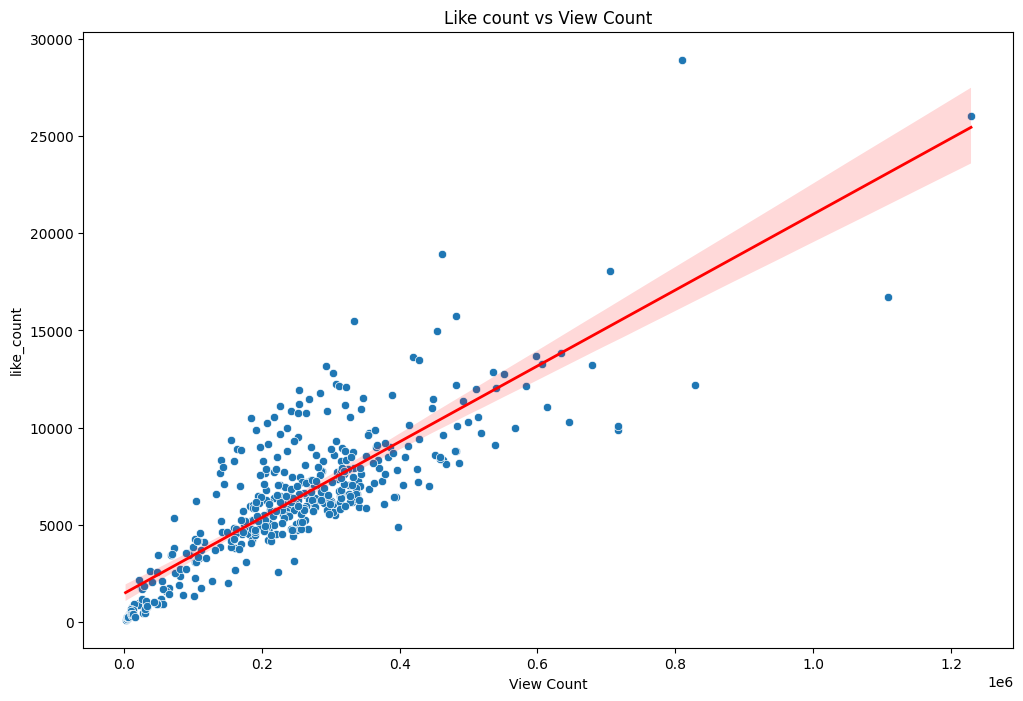

In [79]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=full_df, x='view_count', y='like_count')
sns.regplot(data=full_df, x='view_count', y='like_count', scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Like count vs View Count')
plt.xlabel('View Count')
plt.ylabel('like_count')
plt.show()


From the Like count vs View Count scatter plt above, we can see that the number of likes is proportional to the number of views. This is expected as the more views a video has, the more likes it is likely to get. However, the number of likes is not directly proportional to the number of views. This is because the number of likes is dependent on the quality of the content and the engagement of the audience.



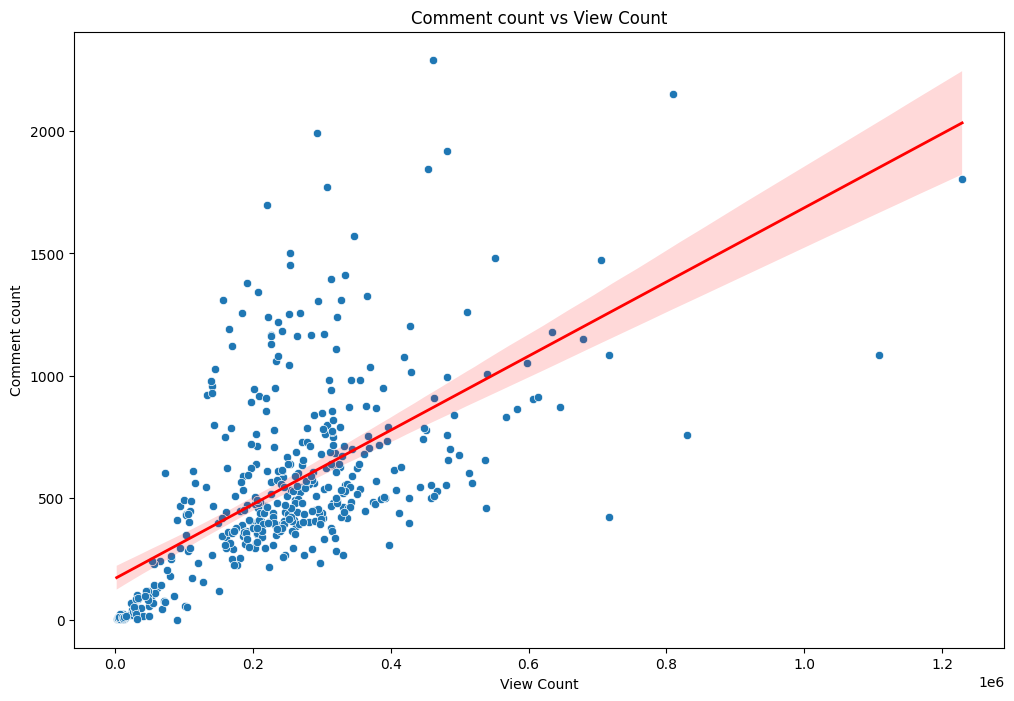

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=full_df, x='view_count', y='comment_count')
sns.regplot(data=full_df, x='view_count', y='comment_count', scatter=False, color='red', line_kws={'linewidth': 2})

plt.title('Comment count vs View Count')
plt.xlabel('View Count')
plt.ylabel('Comment count')
plt.show()


From the Comment count vs View Count scatter plt above, we can see that the number of comments is proportional to the number of views. This is expected as the more views a video has, the more comments it is likely to get. However, the number of comments is not directly proportional to the number of views. This is because the number of comments is dependent on the quality of the content and the engagement of the audience.

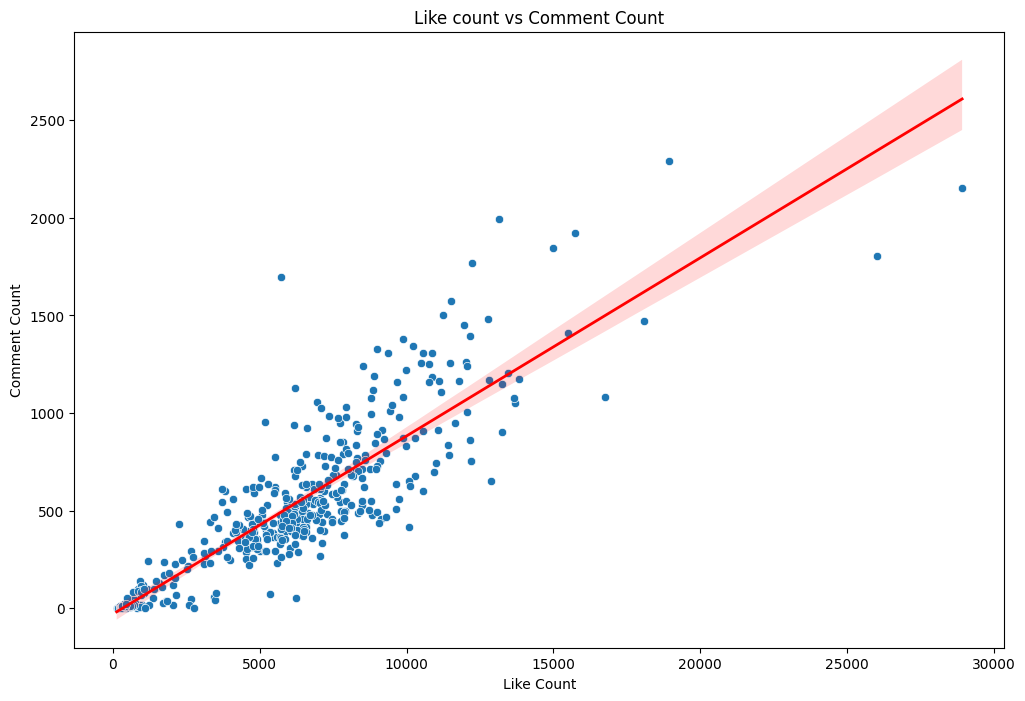

In [85]:
# plotting the like to comment 
plt.figure(figsize=(12, 8))
sns.scatterplot(data=full_df, x='like_count', y='comment_count')
sns.regplot(data=full_df, x='like_count', y='comment_count', scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Like count vs Comment Count')
plt.xlabel('Like Count')
plt.ylabel('Comment Count')
plt.show()



From like count  to comment count scatter plot, we can see that the number of likes is proportional to the number of comments. This is expected as the more likes a video has, the more comments it is likely to get. However, the number of comments is not directly proportional to the number of likes. This is because the number of comments is dependent on the quality of the content and the engagement of the audience.

### Visualize Sentiment Analysis:

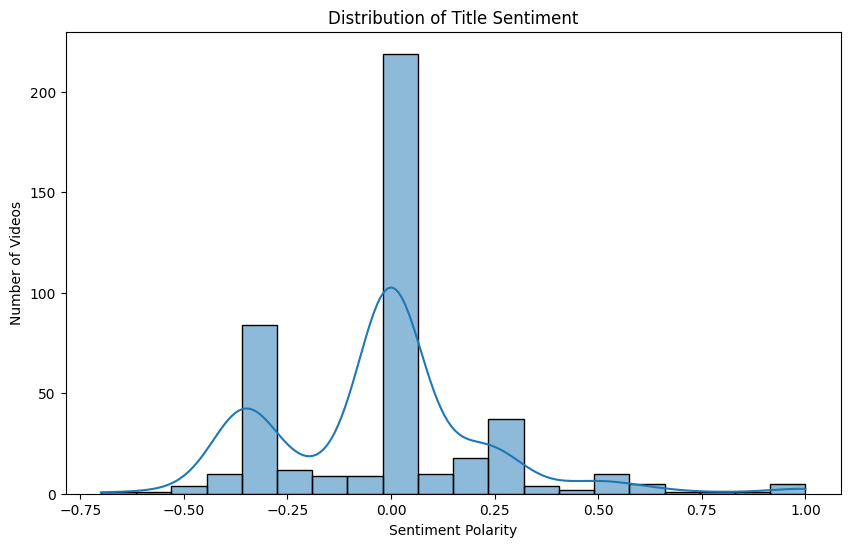

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(full_df['title_sentiment'], bins=20, kde=True)
plt.title('Distribution of Title Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Videos')
plt.show()


# Correlation

In [72]:
numeric_columns = full_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = full_df[numeric_columns].corr()
correlation_matrix


,view_count,like_count,comment_count,like_view_ratio,comment_view_ratio,title_sentiment
view_count,1.000000,0.843124,0.621732,-0.502133,-0.088937,-0.168463
like_count,0.843124,1.000000,0.864278,-0.160332,0.277296,-0.157394
comment_count,0.621732,0.864278,1.000000,-0.042697,0.621380,-0.132113
like_view_ratio,-0.502133,-0.160332,-0.042697,1.000000,0.355193,0.159675
comment_view_ratio,-0.088937,0.277296,0.621380,0.355193,1.000000,0.062593
title_sentiment,-0.168463,-0.157394,-0.132113,0.159675,0.062593,1.000000


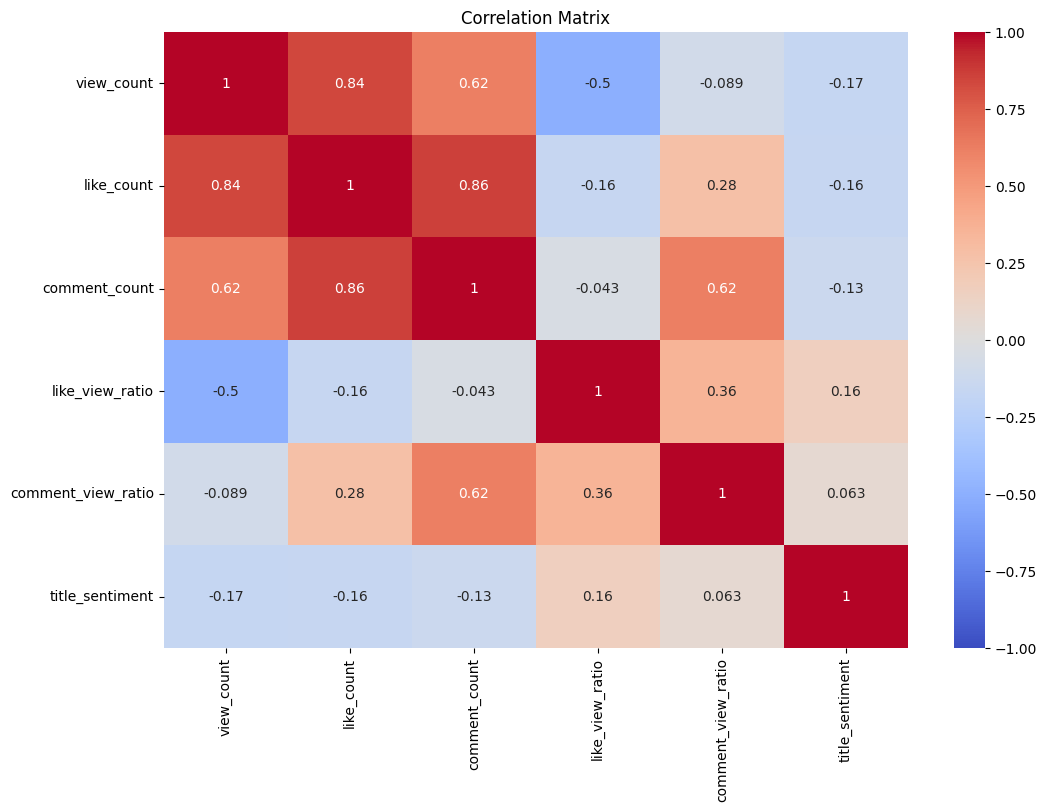

In [73]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Explaining correlation between Views and likes:
From the correlation matrix above, we can see that the correlation between views and likes is 0.84. This means that the number of views and likes are highly correlated. This is expected as the more views a video gets, the more likes it is likely to get. This is because people who view the video are likely to like it if they find it interesting.

### Explaining correlation between Views and comments:
From the correlation matrix above, we can see that the correlation between views and comments is 0.62. This means that the number of views and comments are moderately correlated. This is expected as the more views a video gets, the more comments it is likely to get. This is because people who view the video are likely to comment on it if they find it interesting.

### Explaining correlation between likes and comments:
From the correlation matrix above, we can see that the correlation between likes and comments is 0.86. This means that the number of likes and comments are highly correlated. This is expected as the more likes a video gets, the more comments it is likely to get. This is because people who like the video are likely to comment on it if they find it interesting.
